In [1]:
state = 'WV' 
year = 2020

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json
from epsilon_constraint import*
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of WV has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from WV_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 10 plans from file.


In [6]:
obj_type = 'inverse_Polsby_Popper'
starting_deviation = 0.01 
verbose = True
contiguity = 'lcut'               # {'lcut', 'scf', 'shir'}
warm_start_mode = 'user'          # {'None', 'user', 'refinement'}
warm_starts = warm_starts         # if you have user define warm starts else it is None
time_limit = 7200                 # Time limit in seconds, adjust as needed
multiplier = 0                    # Adjust multiplier as needed
max_B = True                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True
symmetry_breaking = 'orbitope'    # {None, 'orbitope', 'rsum'}              
sizes = None

In [7]:
print(f"Running epsilon constraint method for state {state}, objective {obj_type}")
print(f"{'#' * 100}\n")
(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity,        
            cutoff=None,       
            verbose=verbose,
            warm_start_mode = warm_start_mode,
            warm_starts=warm_starts,  
            starting_deviation=starting_deviation, 
            time_limit=time_limit, 
            sizes=sizes,      
            max_B=max_B,      
            symmetry_breaking=symmetry_breaking, 
            state=state,
            year=year
        )

Running epsilon constraint method for state WV, objective inverse_Polsby_Popper
####################################################################################################

L = 887890 and U = 905826

****************************************
Trying deviation = 8968.58
****************************************
Using user-provided warm starts.
Selected warm_start = [[0, 4, 8, 13, 17, 18, 19, 23, 26, 28, 29, 31, 33, 34, 36, 42, 45, 50, 52, 54], [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 20, 21, 22, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 51, 53]]
Objective value: 4.911562068117615
Deviation: 7758.0

****************************************
Running labeling model!
****************************************
L = 887890 and U = 905826
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set param

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1629 rows, 1306 columns and 5459 nonzeros
Model fingerprint: 0x4dec59b4
Model has 2 quadratic constraints
Variable types: 336 continuous, 970 integer (970 binary)
Coefficient statistics:
  Matrix range     [3e-04, 2e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bound

     0     0    3.71766    0   78    5.32754    3.71766  30.2%     -    1s
     0     0    3.71766    0   78    5.32754    3.71766  30.2%     -    1s
     0     0    3.72063    0   78    5.32754    3.72063  30.2%     -    1s
     0     2    3.74978    0   78    5.32754    3.74978  29.6%     -    2s

Cutting planes:
  Gomory: 2
  Cover: 1
  Zero half: 7
  Lazy constraints: 1

Explored 634 nodes (18101 simplex iterations) in 2.92 seconds (0.28 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 5.32754 

Optimal solution found (tolerance 0.00e+00)
Best objective 5.327541455743e+00, best bound 5.327541455743e+00, gap 0.0000%

User-callback calls 1966, time in user-callback 0.07 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
[[0, 2, 4, 6, 9, 13, 17, 19, 22, 23, 26, 28, 29, 31, 33, 34, 36, 42, 45, 49, 50, 51, 52, 54], [1, 3, 5, 7, 8, 10, 11, 12, 14, 15, 16, 18, 20, 21, 24, 25, 27, 30

 15116  9974    6.07399   25   33          -    5.32131      -  22.0   30s
 19325 12588    9.09594   41   61          -    5.42269      -  21.2   35s
H20574  9992                       8.8744388    5.42269  38.9%  21.0   36s
H20713  7625                       7.7153653    5.42269  29.7%  21.0   36s
H20866  6104                       7.2128771    5.43001  24.7%  21.0   36s
H20913  5946                       7.1571675    5.43001  24.1%  21.0   36s
H21044  5946                       7.1571675    5.43001  24.1%  21.0   36s
 23561  6328    6.47435   35   50    7.15717    5.54190  22.6%  20.8   40s
H23797  5990                       7.0633546    5.56216  21.3%  20.7   40s
H24381  3117                       6.3622987    5.60961  11.8%  20.7   42s
 28245   300 infeasible   30         6.36230    5.97536  6.08%  20.8   45s

Cutting planes:
  Gomory: 20
  Cover: 6
  MIR: 7
  StrongCG: 4
  Flow cover: 2
  Zero half: 21
  Lazy constraints: 43

Explored 29752 nodes (604065 simplex iterations) in 46.

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1629 rows, 1306 columns and 5459 nonzeros
Model fingerprint: 0x4403b7e8
Model has 2 quadratic constraints
Variable types: 336 continuous, 970 integer (970 binary)
Coefficient statistics:
  Matrix range     [3e-04, 2e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+05]
Presolve removed 936 rows and 650 columns
Presolve time: 0.02s
Presolved: 693 rows, 656 columns, 2742 nonzeros
Presolved model has 2 quadratic constraint(s)
Variable types: 6 continuous, 650 integer (650 binary)

Root relaxation: objective 3.759725e-04, 255 iter

 19490 13415    6.69367   55   14          -    5.44042      -  20.8   25s
 25830 17372    6.14519   48   22          -    5.53736      -  19.8   30s
 31207 20332    5.82117   33   33          -    5.61458      -  19.4   35s
 37909 24167    8.10507   46   40          -    5.66739      -  18.9   40s
 45507 28752    8.68042   41   27          -    5.72564      -  18.8   46s
 51565 31528    6.68371   21   90          -    5.79374      -  18.7   50s
 59155 36242   10.06162   55   19          -    5.85465      -  18.7   55s
 67055 40603    8.47197   46   24          -    5.89790      -  18.7   60s
 75317 44986    8.44845   32   34          -    5.94953      -  18.7   65s
 81753 47967    6.24146   25   23          -    6.00865      -  18.7   71s
 87531 51471   10.19628   42   16          -    6.03868      -  18.7   75s
 95601 55815    9.30073   33   42          -    6.08482      -  18.7   81s
 99353 57844    6.62166   30   10          -    6.10734      -  18.7   85s
 105915 60677 infeasible 

In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
# Determine the senses for the Pareto frontier
# Minimize the first objective ('deviation').
# Maximize the second objective for compactness types, otherwise minimize it.
senses = ['min', 'max' if obj_type in ['average_Polsby_Popper','bottleneck_Polsby_Popper'] else 'min']
obj_names = ['deviation_persons', obj_type]
infeasible_region = [0, min(round(r[2],1) for r in result)]


####################################################################################################
Pareto Frontier for state WV,  objective inverse_Polsby_Popper
####################################################################################################

Pareto front plans: [[[0, 2, 4, 6, 8, 9, 13, 17, 19, 20, 22, 23, 26, 28, 29, 31, 33, 34, 36, 42, 43, 45, 50, 51, 54], [1, 3, 5, 7, 10, 11, 12, 14, 15, 16, 18, 21, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 44, 46, 47, 48, 49, 52, 53]], [[0, 2, 6, 7, 17, 19, 21, 23, 24, 26, 28, 29, 31, 32, 33, 34, 35, 36, 39, 42, 45, 50, 51], [1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 22, 25, 27, 30, 37, 38, 40, 41, 43, 44, 46, 47, 48, 49, 52, 53, 54]], [[0, 2, 6, 17, 18, 19, 22, 23, 26, 28, 29, 31, 33, 34, 36, 42, 43, 45, 49, 50, 51, 52, 54], [1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 20, 21, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 44, 46, 47, 48, 53]], [[0, 2, 4, 8, 13, 15, 17, 18, 19, 20, 22, 23, 26, 27, 28, 29, 31

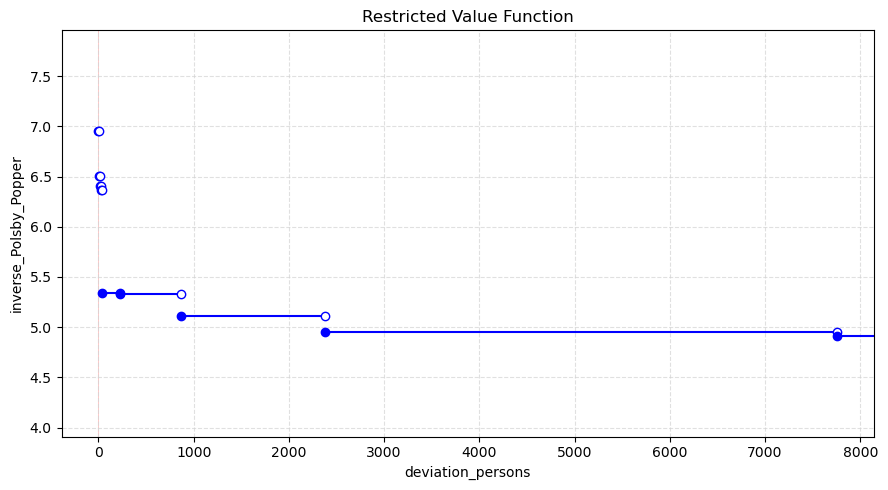

In [10]:
from pareto import ParetoFrontier

print(f"\n{'#' * 100}\nPareto Frontier for state {state},  objective {obj_type}\n{'#' * 100}\n")
pareto = ParetoFrontier(senses, obj_names, state=state, level='county')

if not  plans:
    print("No plan found!")
else:
    for plan, obj_bound, dev in result:
        upper_bound = [dev,  1/obj_bound[0] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[0]]
        lower_bound = [dev,  1/obj_bound[1] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[1]]
        
        pareto.add_plan(plan, upper_bound, lower_bound)
            
print("Pareto front plans:", pareto.plans)
print("Pareto front upper bounds:", pareto.upper_bounds)
print("Pareto front lower bounds:", pareto.lower_bounds)
    
#extra_points: list of tuples, each containing (deviation, objective_value, label)
if  year == 2010:
    
    #2010 enacted map scores
    enacted_map_deviation = 3197.333333333372
    enacted_map_scores = {'inverse_Polsby_Popper': 7.75, 'cut_edges': 34.00, 
                                      'perimeter': 42.12, 'average_Polsby_Popper': 0.14,'bottleneck_Polsby_Popper': 0.10}
    # Cooper plan 1
    Cooper_plan_1_deviation = 323.66666666662786
    Cooper_plan_1_scores = {'inverse_Polsby_Popper': 7.31, 'cut_edges': 34.00, 
                                      'perimeter': 40.53, 'average_Polsby_Popper': 0.17,'bottleneck_Polsby_Popper': 0.10}
    # Cooper plan 2
    Cooper_plan_2_deviation = 232.66666666662786
    Cooper_plan_2_scores = {'inverse_Polsby_Popper': 8.18, 'cut_edges': 36.00, 
                                      'perimeter': 43.36, 'average_Polsby_Popper': 0.16,'bottleneck_Polsby_Popper': 0.09}
    # Cooper plan 3
    Cooper_plan_3_deviation = 115.66666666662786
    Cooper_plan_3_scores = {'inverse_Polsby_Popper': 7.25, 'cut_edges': 35.00, 
                                      'perimeter': 40.65, 'average_Polsby_Popper': 0.16,'bottleneck_Polsby_Popper': 0.09}
    extra_points = [
                (enacted_map_deviation,  enacted_map_scores[obj_type], 'Enacted Map'),
                (Cooper_plan_1_deviation,  Cooper_plan_1_scores[obj_type] , 'Cooper plan 1'),
                (Cooper_plan_2_deviation,  Cooper_plan_2_scores[obj_type], 'Cooper plan 2'),
                (Cooper_plan_3_deviation, Cooper_plan_3_scores[obj_type], 'Cooper plan 3'),
                        ]
    
    #extra_colors: list of colors corresponding to the points in extra_points
    extra_colors = ['r', 'g', 'c', 'y']  # Red, Green, Cyan, Yellow for each of the extra points
    
    for ep in extra_points:
        print(f"The {ep[2]} has an objective value of {ep[1]} and a deviation of {ep[0]}.")
else:
    extra_points = None
    extra_colors = None
        
pareto.tighten_lower_bounds()
    
if infeasible_region[1] > 0.5:
    max_dev = max(upper_bound[0] for upper_bound in pareto.upper_bounds)
    max_obj = max(upper_bound[1] for upper_bound in pareto.upper_bounds)
    min_obj = min(upper_bound[1] for upper_bound in pareto.upper_bounds)
    o1lim=[-1, max_dev+100]
    o2lim=[min_obj*0.9, max_obj*(1.1)]
else:
    o1lim = None
    o2lim = None

pareto.plot_with_custom_x_ranges(method = 'epsilon_constraint_method', splits=None, 
                                 o1lim=o1lim, o2lim=o2lim, infeasible_region = infeasible_region,
                                 extra_points=extra_points, extra_colors=extra_colors)  


####################################################################################################
Pareto maps for state WV, objective inverse_Polsby_Popper
####################################################################################################



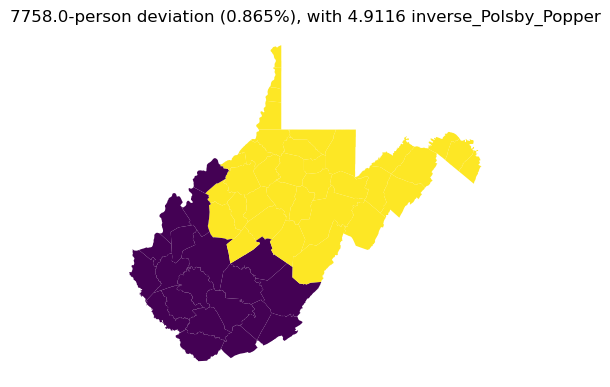

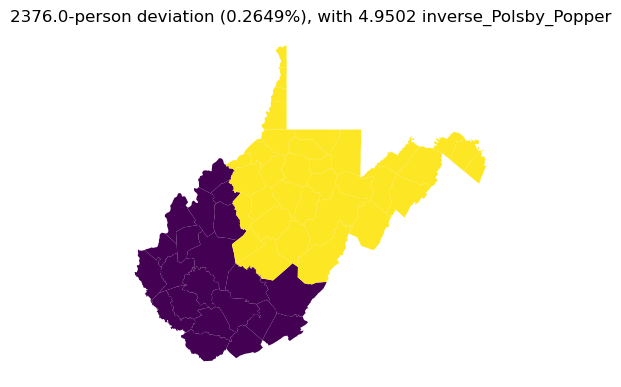

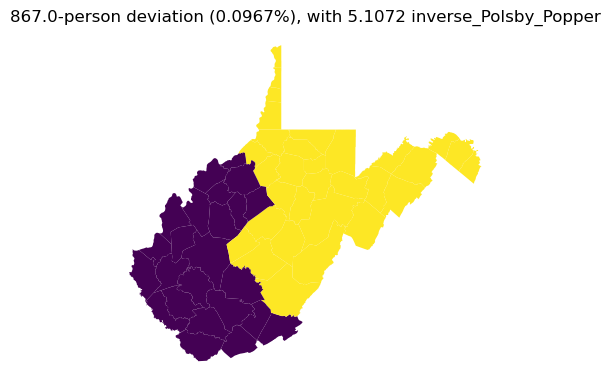

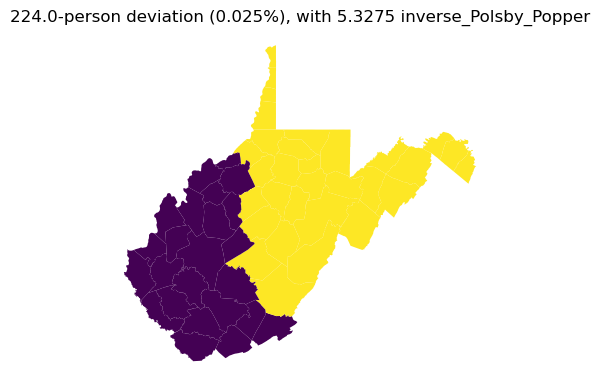

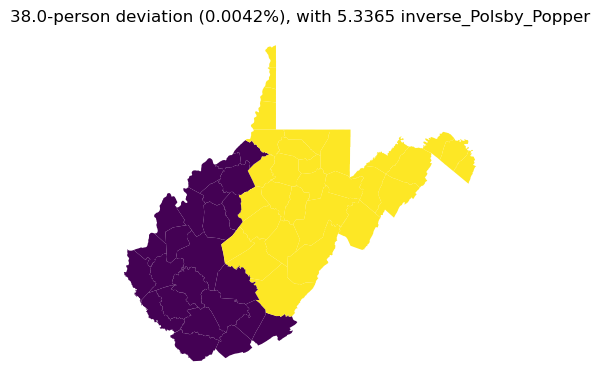

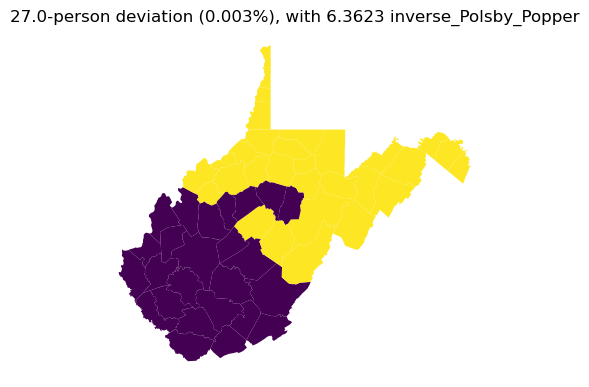

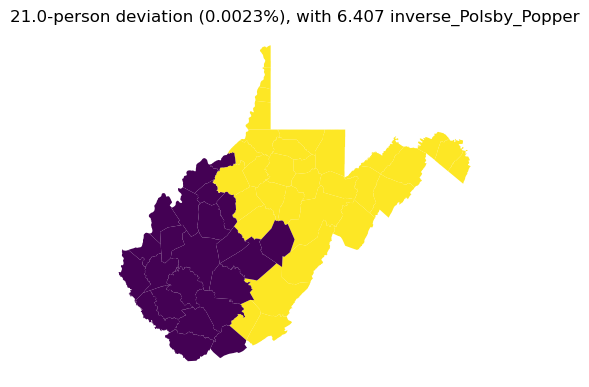

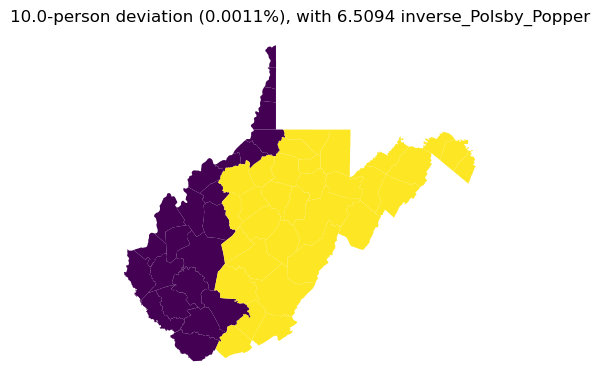

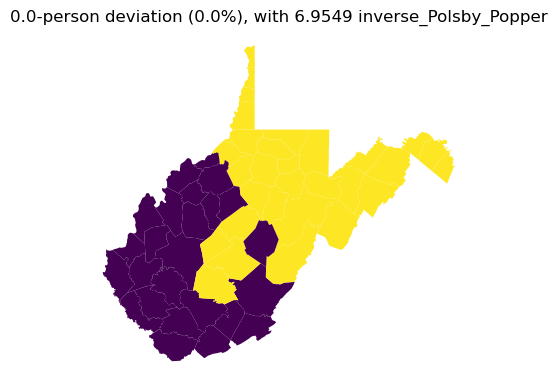

In [11]:
from draw import *

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: round(x, 0)}

for plan, obj_bound, dev in result:
    ub = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[0])
    lb = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[1])
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    if ub != lb:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), obj_bounds [{ub}, {lb}] {obj_type}"
    else:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), with {ub} {obj_type}"

    draw_plan(filepath, filename2, G, plan, title=title, year=year)